In [137]:
import re
import os
import time
import requests
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [138]:
with open("df_new.p", 'rb') as picklefile: 
    df_new = pickle.load(picklefile)
with open("df_top.p", 'rb') as picklefile: 
    df_top = pickle.load(picklefile)

df_new['chart']='new'
df_top['chart']='top'
df_concat=pd.concat([df_top,df_new])

/Users/jangdayoung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [139]:
df_concat.playback_count=df_concat.playback_count.apply(lambda x: np.float(x) )
df_concat.reposts_count=df_concat.reposts_count.apply(lambda x: np.float(x) )
df_concat.comment_count=df_concat.comment_count.apply(lambda x: np.float(x) )
df_concat.followers_count=df_concat.followers_count.apply(lambda x: np.float(x) )
df_concat.playlist_count=df_concat.playlist_count.apply(lambda x: np.float(x) )
df_concat.track_count=df_concat.track_count.apply(lambda x: np.float(x) )
df_concat.duration=df_concat.duration.apply(lambda x: np.float(x) )
df_concat.likes_count=df_concat.likes_count.apply(lambda x: np.float(x) )

df_concat.full_duration=df_concat.full_duration.apply(lambda x: np.float(x) )
df_concat['display_date2']=df_concat['display_date'].apply(lambda x: x.split('T')[0])
df_concat['display_date2']=pd.to_datetime(df_concat['display_date2'])
df_concat['age']=df_concat['display_date2'].apply(lambda x:(datetime.datetime.today()-x).days)

In [141]:
df_temp_all=df_concat
df_temp_top=df_concat[df_temp_all['chart']=='top']
df_temp_new=df_concat[df_temp_all['chart']=='new']

In [142]:
with open('df_all.pkl', 'wb') as picklefile:
    pickle.dump(df_temp_all, picklefile)
    
with open('df_top.pkl', 'wb') as picklefile:
    pickle.dump(df_temp_top, picklefile)
    
with open('df_new.pkl', 'wb') as picklefile:
    pickle.dump(df_temp_new, picklefile)

In [143]:
df_temp_top.describe()

,comment_count,duration,followers_count,full_duration,likes_count,playback_count,playlist_count,reposts_count,track_count,age
count,1494.000000,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.496000e+03,1500.000000,1500.000000,1500.000000,1500.00000
mean,1007.174029,6.458810e+05,3.274586e+05,6.475054e+05,8.782332e+04,5.836960e+06,19.902000,7262.269333,180.191333,1068.73800
std,3149.176193,1.480665e+06,9.552821e+05,1.480104e+06,1.902292e+05,1.353828e+07,50.205519,18617.092075,467.485941,1212.04486
min,0.000000,3.000000e+04,0.000000e+00,4.840900e+04,1.000000e+00,2.560000e+02,0.000000,0.000000,1.000000,7.00000
25%,45.000000,1.842645e+05,1.835750e+03,1.856235e+05,5.207000e+03,2.701895e+05,1.000000,304.750000,20.750000,198.75000
50%,195.000000,2.192650e+05,2.674800e+04,2.195000e+05,2.253600e+04,1.466984e+06,4.000000,1353.000000,51.000000,866.00000
75%,715.750000,2.786018e+05,1.624635e+05,2.792105e+05,8.500275e+04,5.299062e+06,13.000000,5525.500000,130.500000,1575.25000
max,73304.000000,2.328776e+07,9.775368e+06,2.328776e+07,2.762629e+06,1.981223e+08,438.000000,293675.000000,6959.000000,15596.00000


In [70]:
df_temp_new.describe()

,comment_count,duration,followers_count,full_duration,likes_count,playback_count,playlist_count,reposts_count,track_count,age
count,1482.000000,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000,1.485000e+03,1500.000000,1500.000000,1500.000000,1500.00000
mean,20.547908,1.058200e+06,1.846564e+05,1.060332e+06,841.894667,1.713346e+04,17.274667,87.735333,200.622667,26.85400
std,77.519988,2.028106e+06,1.139934e+06,2.027128e+06,4147.666813,1.112459e+05,53.018637,314.699418,467.744308,384.04483
min,0.000000,1.708500e+04,0.000000e+00,1.708500e+04,0.000000,1.000000e+00,0.000000,0.000000,1.000000,2.00000
25%,0.000000,1.619215e+05,8.575000e+01,1.653820e+05,12.750000,3.090000e+02,0.000000,1.000000,10.000000,4.00000
50%,3.000000,2.198535e+05,1.481500e+03,2.204150e+05,80.000000,1.504000e+03,2.000000,9.000000,41.000000,6.00000
75%,15.000000,4.345675e+05,1.545375e+04,4.345675e+05,336.000000,5.960000e+03,10.000000,54.000000,157.000000,8.00000
max,1376.000000,1.800554e+07,9.775767e+06,1.800554e+07,74301.000000,2.638558e+06,735.000000,5088.000000,4659.000000,10318.00000


In [49]:

# plt.xscale('log')
# plt.hist(df_list[:2][::-1],bins=bins,color=colors[:2],alpha=0.3)
# plt.show()

In [83]:
bins_log = 10**(np.arange(0,9))
bins_none='auto'
def draw_multiple_hist(feat,scales=['log','log','log'],bins=[bins_log,bins_log,bins_log]):
        # for i in range(3):
    df_temp_all=df_concat
    df_temp_top=df_temp_all[df_temp_all['chart']=='top']
    df_temp_new=df_temp_all[df_temp_all['chart']=='new']

    df_temp_all=df_temp_all[feat][~np.isnan(df_temp_all[feat])]
    df_temp_top=df_temp_top[feat][~np.isnan(df_temp_top[feat])]
    df_temp_new=df_temp_new[feat][~np.isnan(df_temp_new[feat])]

    df_list=[df_temp_top,df_temp_new,df_temp_all]
    colors=['r','b','purple']
    fig=plt.figure(figsize=(18,4))

    for i in range(3):
        ax=fig.add_subplot(1,3,i+1)
        ax.set_xscale(scales[i])
        ax.set_ylabel('counts')
        ax.set_xlabel(feat) 
        ax.hist(df_list[i],bins=bins[i],color=colors[i],alpha=0.5)

    plt.xscale('log')
    plt.hist(df_list[2],bins=bins[2],color=colors[2],alpha=1)
    plt.hist(df_list[0],bins=bins[0],color=colors[0],alpha=0.3)
    plt.hist(df_list[1],bins=bins[1],color=colors[1],alpha=0.7)

    plt.show()
    

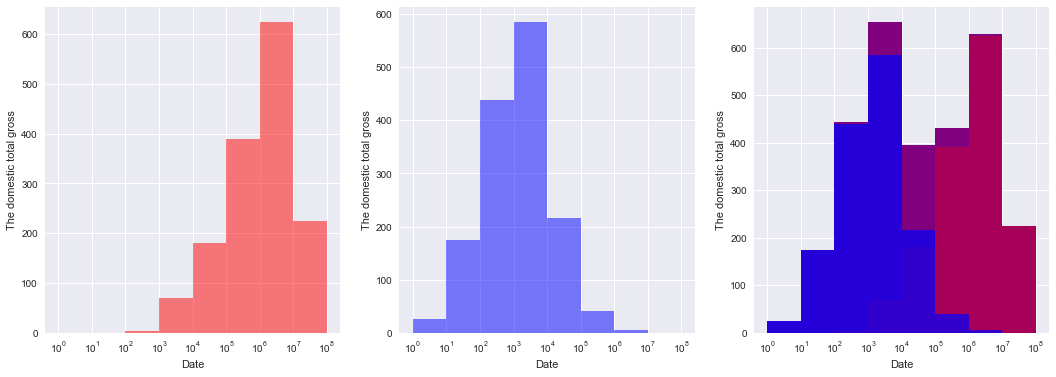

In [59]:
# for i in range(3):
df_temp_all=df_concat
df_temp_top=df_temp_all[df_temp_all['chart']=='top']
df_temp_new=df_temp_all[df_temp_all['chart']=='new']

df_temp_all=df_temp_all['playback_count'][~np.isnan(df_temp_all['playback_count'])]
df_temp_top=df_temp_top['playback_count'][~np.isnan(df_temp_top['playback_count'])]
df_temp_new=df_temp_new['playback_count'][~np.isnan(df_temp_new['playback_count'])]

bins = 10**(np.arange(0,9))
df_list=[df_temp_top,df_temp_new,df_temp_all]
colors=['r','b','purple']
fig=plt.figure(figsize=(18,6))

for i in range(3):
    ax=fig.add_subplot(1,3,i+1)
    ax.set_xscale('log')
    ax.set_ylabel('The domestic total gross')
    ax.set_xlabel('Date') 
    ax.hist(df_list[i],bins=bins,color=colors[i],alpha=0.5)

plt.xscale('log')
plt.hist(df_list[2],bins=bins,color=colors[2],alpha=1)
plt.hist(df_list[0],bins=bins,color=colors[0],alpha=0.3)
plt.hist(df_list[1],bins=bins,color=colors[1],alpha=0.7)

plt.show()

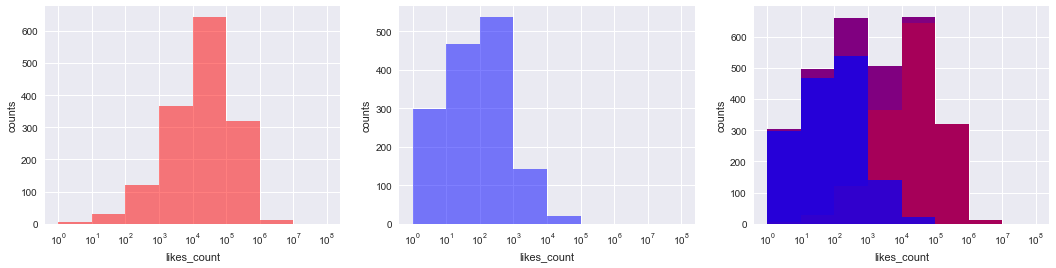

In [84]:
draw_multiple_hist('likes_count')


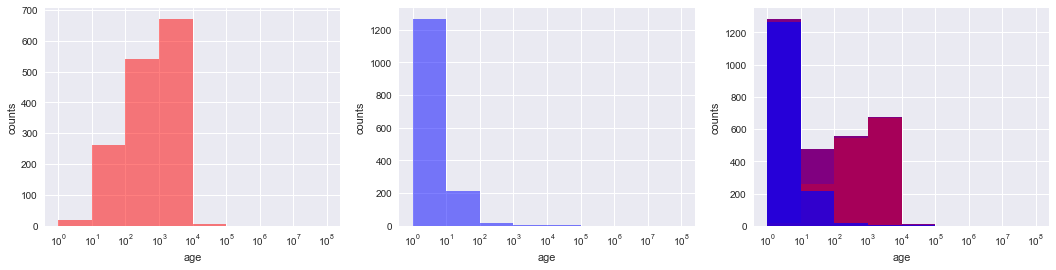

In [86]:
draw_multiple_hist('age')

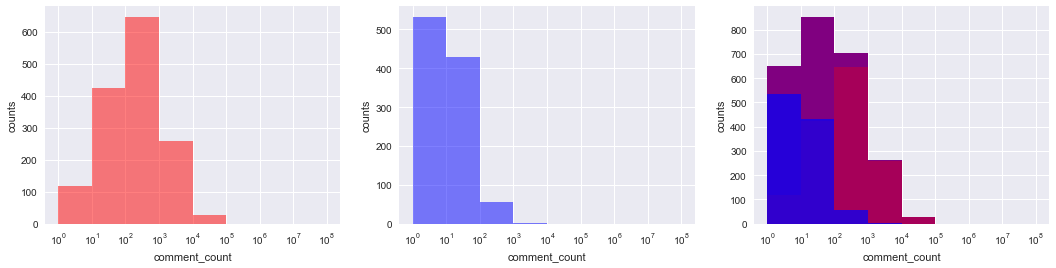

In [87]:
draw_multiple_hist('comment_count')

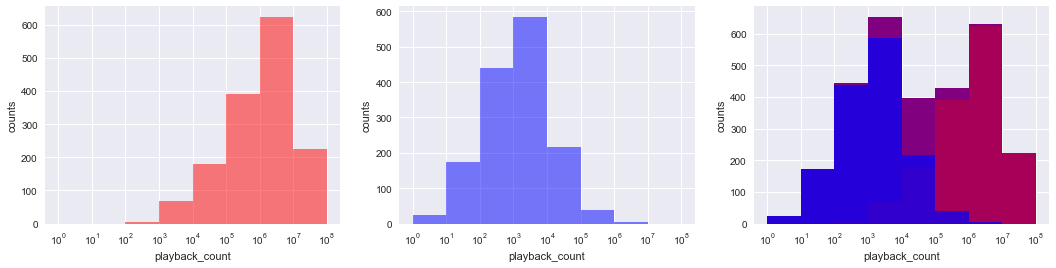

In [88]:
draw_multiple_hist('playback_count')

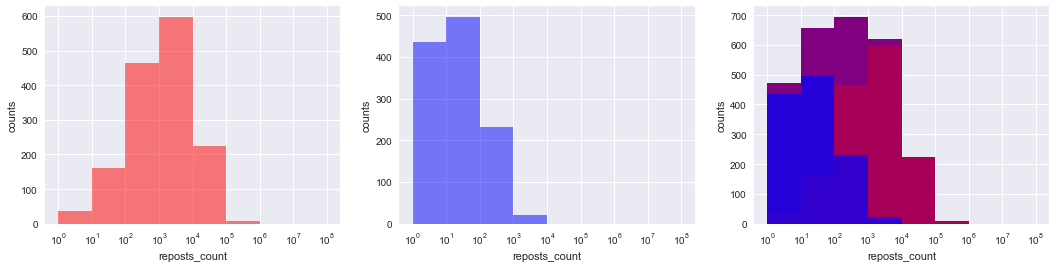

In [89]:
draw_multiple_hist('reposts_count')

In [122]:
for col in df_top_pair.columns:
    df_top_pair[col]=df_top_pair[col].apply(lambda x: np.log(x)/np.log(10))
    
for col in df_new_pair.columns:
    df_new_pair[col]=df_new_pair[col].apply(lambda x: np.log(x)/np.log(10))

In [123]:
df_top_pair.replace(-np.inf,np.nan,inplace=True)
df_top_pair.dropna(how='any',inplace=True)


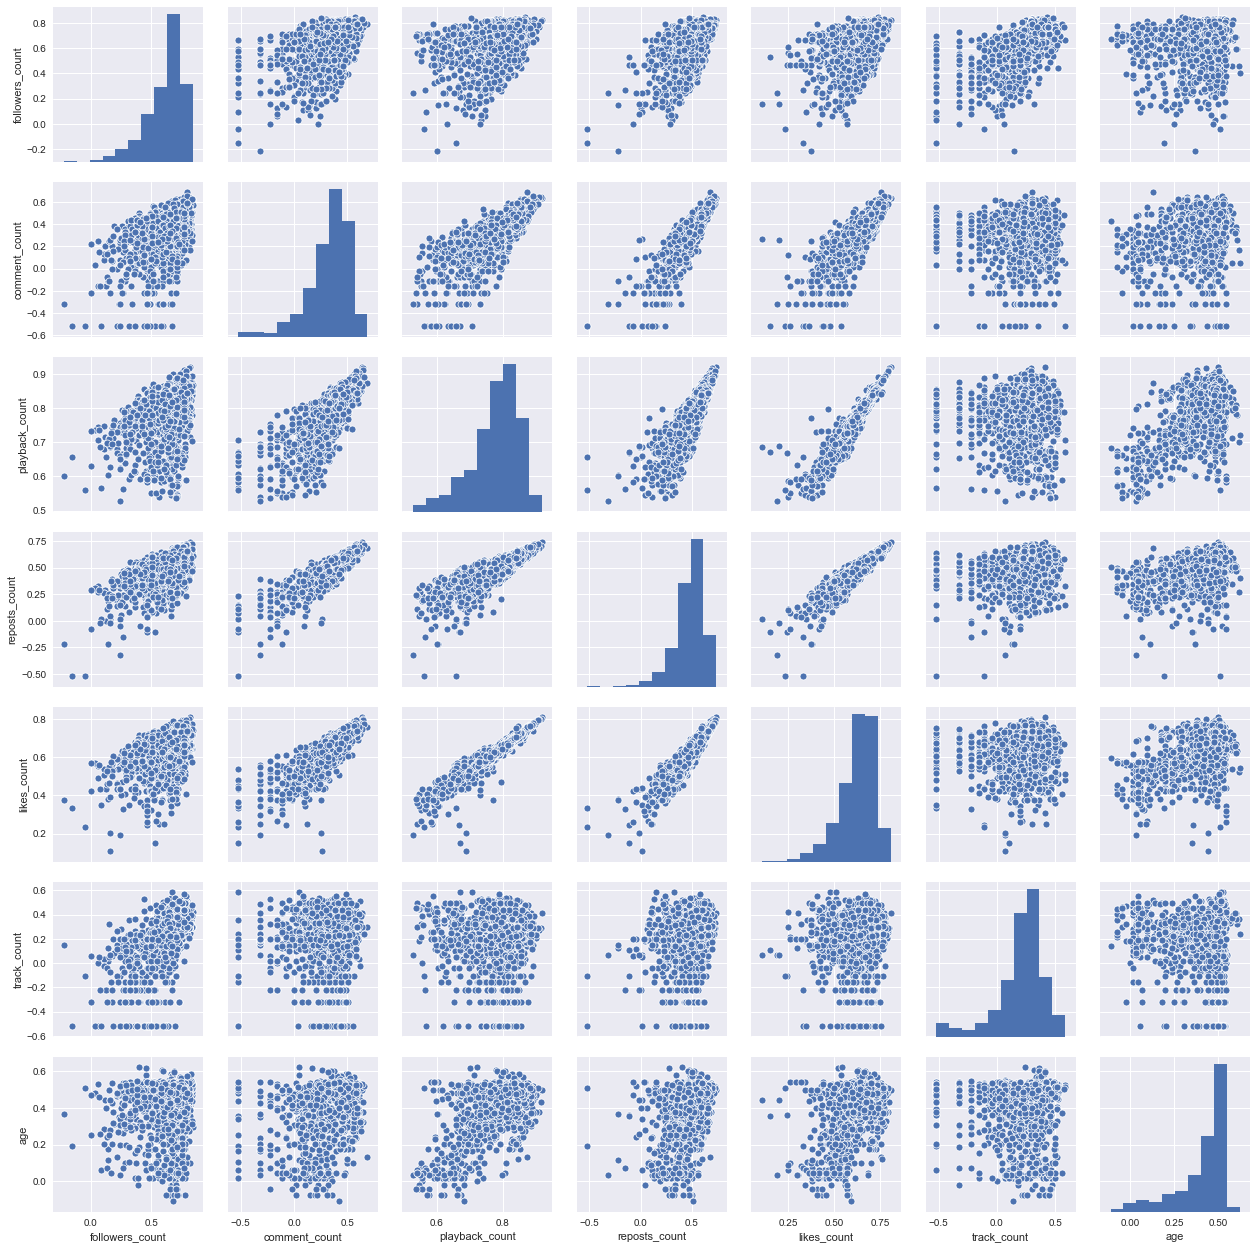

In [124]:
# df_concat_pair=df_concat[['followers_count','comment_count','playback_count','reposts_count','likes_count','track_count','age']].dropna(how='any')
g= sns.pairplot(df_top_pair)


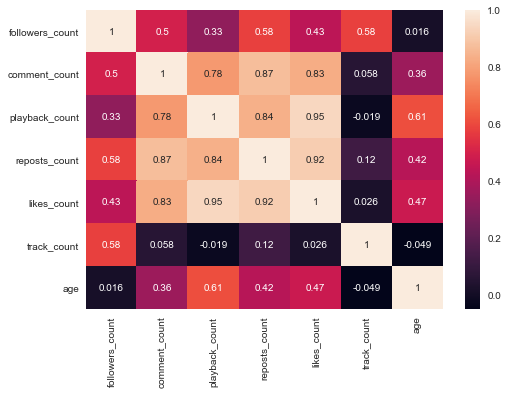

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, y = df_top_pair.drop('playback_count',axis=1), df_top_pair['playback_count']
# hold out 20% of the data for final testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)


In [131]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [132]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.929
Ridge Regression val R^2: 0.929
Degree 2 polynomial regression val R^2: 0.951


In [133]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')


Linear Regression test R^2: 0.879


In [134]:
from sklearn.model_selection import KFold

X, y = df_top_pair.drop('playback_count',axis=1), df_top_pair['playback_count']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [135]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.9609581118338613, 0.9285135569336851, 0.9429934804277421, 0.9642616068150022, 0.9553250005205358]
Ridge scores:  [0.9607595315575297, 0.9287176201503761, 0.943168184747774, 0.964075445347715, 0.9553578196737497] 

Simple mean cv r^2: 0.950 +- 0.013
Ridge mean cv r^2: 0.950 +- 0.013
